In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import plotly
import datetime

c:\Users\DELL\anaconda3\envs\startup\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel('database.xlsx')
print('The size of the dataset is: ' + str(df.shape))
df.head()

The size of the dataset is: (308, 5)


,year,month,total_sold,amount,price
0,2022,8,386017596,697616194,0.553338
1,2022,7,410382928,670845595,0.611740
2,2022,6,386574144,522741852,0.739513
3,2022,5,418765017,570770458,0.733684
4,2022,4,265335690,371026322,0.715140


In [3]:
DS = []
for row in range(df.shape[0]):
    if df.iloc[row,1] < 10:
        value = str(df.iloc[row,0]) + "-0" + str(df.iloc[row,1]) + "-01"
    else:
        value = str(df.iloc[row,0]) + "-" + str(df.iloc[row,1]) + "-01"
    DS.append(value)
df['ds'] = DS
df['ds']=pd.to_datetime(df["ds"])
df['y'] = df['price']
df = df.drop(['year', 'month', 'total_sold', 'amount', 'price'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      308 non-null    datetime64[ns]
 1   y       308 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.9 KB


In [18]:
# Python
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

cutoffs = pd.to_datetime(['2014-02-01', '2014-08-01', '2015-02-01'])

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='3 m')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

08:04:49 - cmdstanpy - INFO - Chain [1] start processing
08:04:49 - cmdstanpy - INFO - Chain [1] done processing
08:04:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
08:04:49 - cmdstanpy - INFO - Chain [1] start processing
08:04:50 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/295 [00:00<?, ?it/s]08:04:51 - cmdstanpy - INFO - Chain [1] start processing
08:04:51 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 1/295 [00:00<02:50,  1.72it/s]08:04:51 - cmdstanpy - INFO - Chain [1] start processing
08:04:51 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 2/295 [00:01<03:06,  1.57it/s]08:04:52 - cmdstanpy - INFO - Chain [1] start processing
08:04:52 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 3/295 [00:01<02:41,  1.81it/s]08:04:52 - cmdstanpy - INFO - Chain [1] start processing
08:04:53 - cmdstanpy - INFO - Chain [1] done process

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.119302
1                     0.001                     0.10  0.121796
2                     0.001                     1.00  0.125487
3                     0.001                    10.00  0.132333
4                     0.010                     0.01  0.116404
5                     0.010                     0.10  0.118452
6                     0.010                     1.00  0.121765
7                     0.010                    10.00  0.129241
8                     0.100                     0.01  0.098177
9                     0.100                     0.10  0.099277
10                    0.100                     1.00  0.101171
11                    0.100                    10.00  0.108980
12                    0.500                     0.01  0.095738
13                    0.500                     0.10  0.096980
14                    0.500                     1.00  0

In [19]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}


09:35:58 - cmdstanpy - INFO - Chain [1] start processing
09:36:00 - cmdstanpy - INFO - Chain [1] done processing


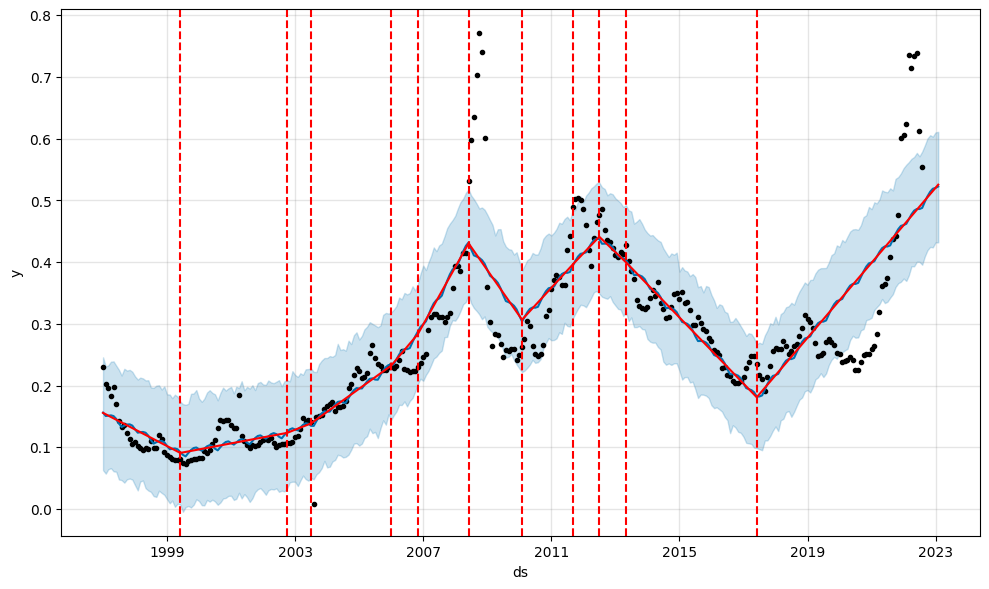

In [20]:
prophet = Prophet(changepoint_prior_scale=0.5,seasonality_prior_scale=0.01)
#prophet = Prophet(changepoints=['2014-01-01'])
prophet.fit(df)

#m <- prophet(weekly.seasonality=FALSE,yearly.seasonality=TRUE,daily.seasonality=FALSE)
#m <- add_seasonality(m, name='monthly', period=30.5, fourier.order=5)

future = prophet.make_future_dataframe(periods=6, freq='M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

In [ ]:
passengers = pd.read_csv('AirPassengers.csv')
df = pd.DataFrame()
df['ds'] = pd.to_datetime(passengers['Month'])
df['y'] = passengers['#Passengers']
df

In [ ]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=12 * 6, freq='M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)